In [1]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import wilson_action
from modules import utility

In [2]:
plaquette_data_notwist = read_and_write.load_from_folder("./output/notwist","plaquette:", "real")

In [3]:
plaquette_data_twist = read_and_write.load_from_folder("./output/twist","plaquette:", "real")

[[{'5.085 0': 0.5849795570948699, '5.087777777777778 0': 0.5837849786355569, '5.0905555555555555 0': 0.581813245419864, '5.093333333333334 0': 0.566800957938453, '5.096111111111111 0': 0.5542136006539051, '5.098888888888889 0': 0.5498922200305565, '5.101666666666667 0': 0.5487633116109235, '5.104444444444445 0': 0.5469133016010662, '5.107222222222222 0': 0.5457855245826003, '5.11 0': 0.5444051540053045}, 'notwist', None], [{'5.085 1': 0.5850579244298143, '5.087777777777778 1': 0.5844853779885385, '5.0905555555555555 1': 0.5839864174047629, '5.093333333333334 1': 0.5832009486989813, '5.096111111111111 1': 0.5820486617684961, '5.098888888888889 1': 0.5803432408586756, '5.101666666666667 1': 0.5762713369497428, '5.104444444444445 1': 0.5726507962418271, '5.107222222222222 1': 0.5635478196654831, '5.11 1': 0.5593262519886544}, 'twist', None]]
[5.085, 5.087777777777778, 5.0905555555555555, 5.093333333333334, 5.096111111111111, 5.098888888888889, 5.101666666666667, 5.104444444444445, 5.10722

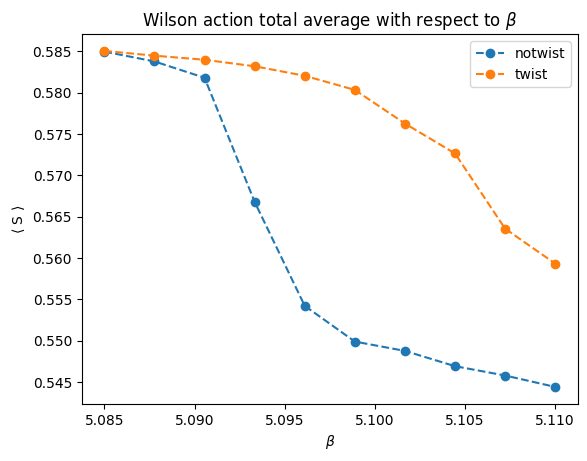

In [20]:
wilson_action.create_average_action_figure(plaquette_data_notwist,"notwist",plaquette_data_twist,"twist")

**Wilson action average with $\beta = 5.08-5.12 $**

Data: "./current_output/{notwist/twist}"

Used command: `wilson_action.create_average_action_figure(subset_data_notwist,"notwist",subset_data_twist,"twist")`

!["./plots/wilson_action_average_question1.png"](./plots/wilson_action_average_question1.png)

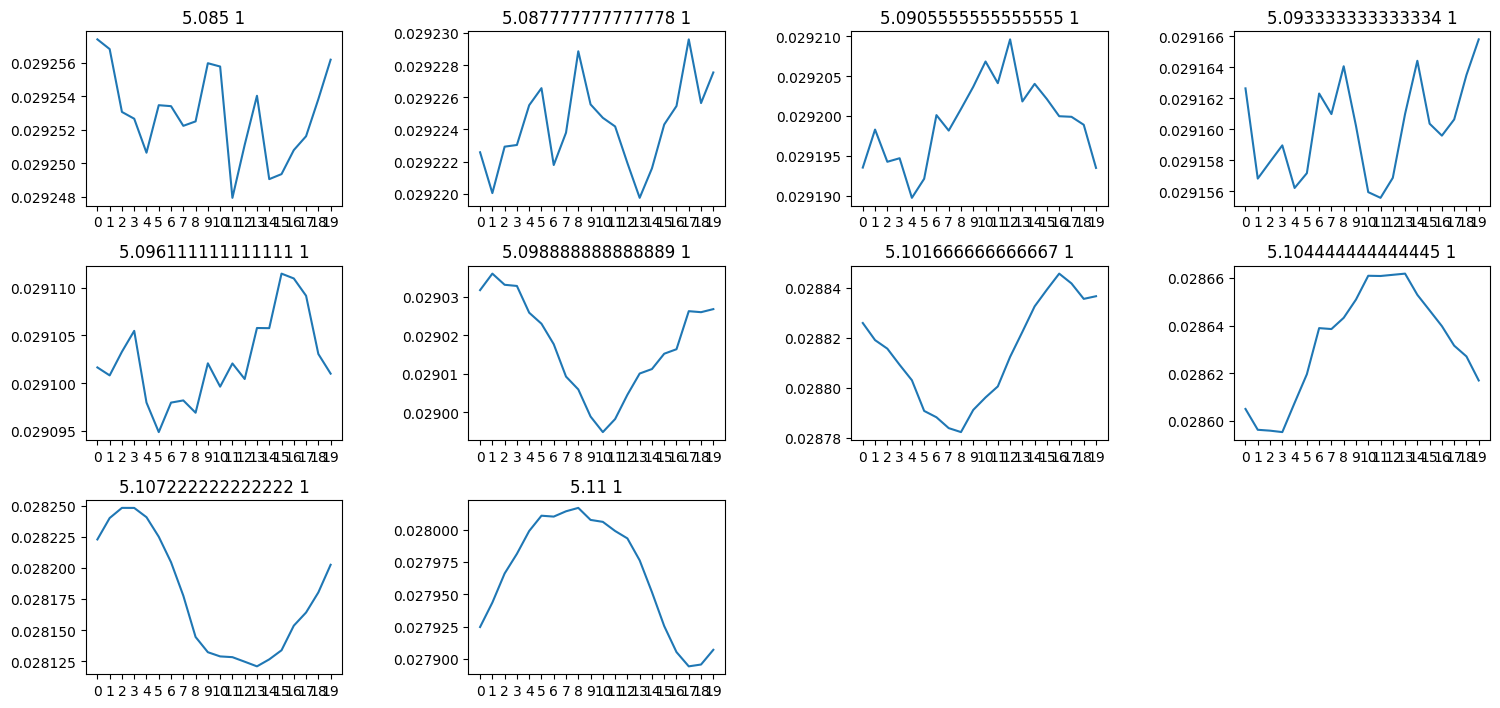

In [5]:
wilson_action.create_z_index_heat_map(plaquette_data_twist,mean=True)

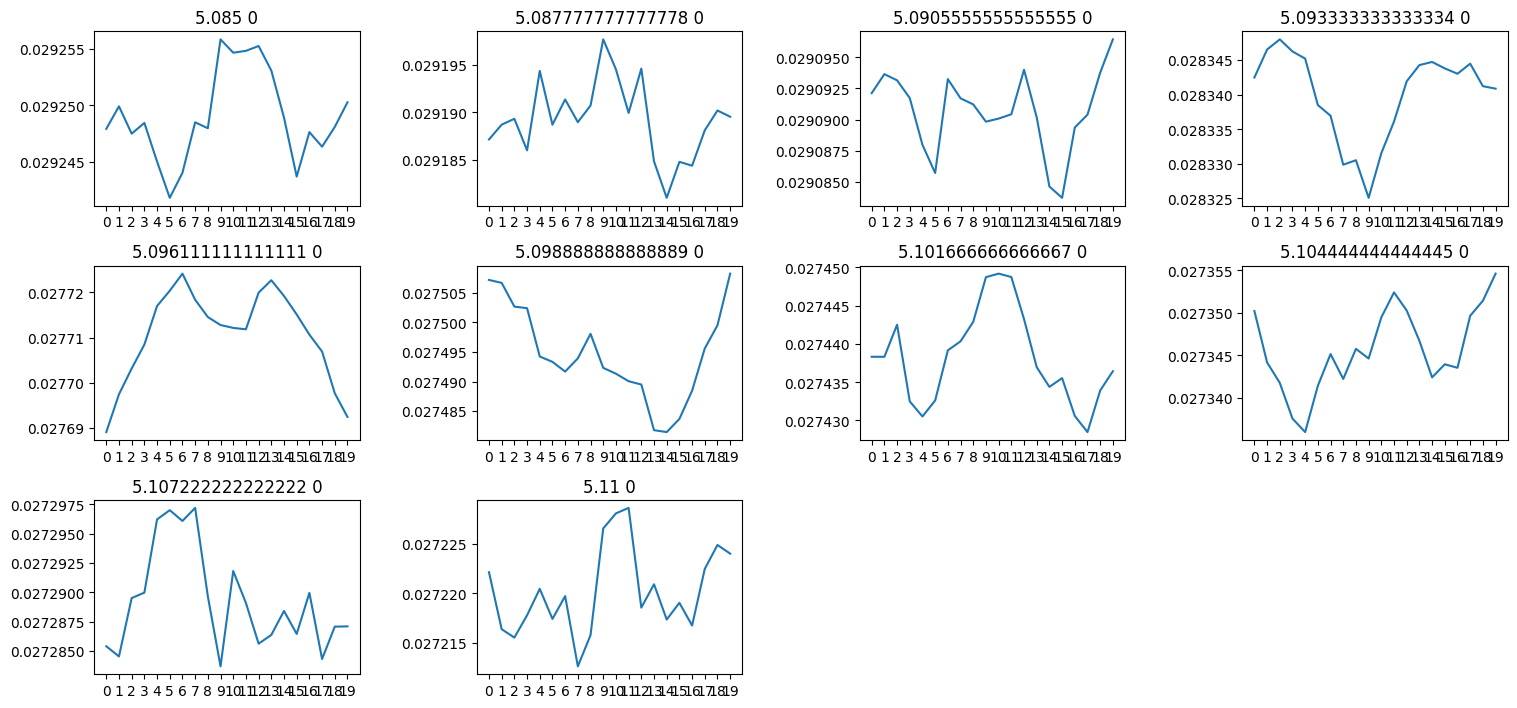

In [6]:
wilson_action.create_z_index_heat_map(utility.select_subset(plaquette_data_notwist,0,12),mean=True)

In [17]:
errors_twist = utility.compute_with_aa(plaquette_data_twist)
errors_notwist = utility.compute_with_aa(plaquette_data_notwist)

sum_errors_twist = {}
sum_errors_notwist = {}

for key,value in errors_twist.items():
    sum_errors_twist[key] = errors_twist[key]["error"].iloc[-1]

for key,value in errors_notwist.items():
    sum_errors_notwist[key] = errors_notwist[key]["error"].iloc[-1]

0       3.59e-06
1     3.4256e-06
2     3.4304e-06
3     3.4445e-06
4     3.3826e-06
5     3.3582e-06
6     3.3843e-06
7     3.4388e-06
8     3.4586e-06
9      3.382e-06
10    3.3938e-06
11    3.4832e-06
12    3.4455e-06
13    3.4975e-06
14    3.5862e-06
15    3.5986e-06
16    3.6589e-06
17    3.7386e-06
18     3.704e-06
19    3.6427e-06
20    3.5587e-05
Name: error, dtype: object
0     3.6257e-06
1     3.6324e-06
2     3.6417e-06
3     3.6228e-06
4      3.571e-06
5     3.5468e-06
6     3.4658e-06
7     3.7104e-06
8     3.6909e-06
9     3.6961e-06
10    3.7012e-06
11    3.8658e-06
12    3.8615e-06
13    3.7409e-06
14    3.7317e-06
15    3.7364e-06
16    3.8313e-06
17    3.8651e-06
18    3.8164e-06
19    3.6202e-06
20    4.5491e-05
Name: error, dtype: object
0     3.8429e-06
1     3.8576e-06
2     3.8682e-06
3      3.882e-06
4      3.933e-06
5     3.8625e-06
6     3.7373e-06
7     3.6554e-06
8      3.623e-06
9     3.5635e-06
10    3.5294e-06
11    3.5616e-06
12    3.6115e-06
13    3.639

In [ ]:
wilson_action.create_average_action_figure(plaquette_data_notwist,"notwist",plaquette_data_twist,"twist",)